# Supervised Learning Project

## Author: Abhinav Roy

### Date - 16/10/2022

In [99]:
# import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
import plotly.express as px # library for visualisations
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.
from scipy.stats import *

import warnings # ignore warnings
warnings.filterwarnings("ignore")

In [100]:
# import machine learning algorithms
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from collections import Counter

In [101]:
# install and import SMOTE module from imblearn library
#!pip install imblearn

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

## Part A

•	DOMAIN:  Medical
•	CONTEXT: Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by  the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results.
•	DATA DESCRIPTION: The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.
•	PROJECT OBJECTIVE: To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms.
•	STEPS AND TASK [30 Marks]:
1.	Data Understanding: [5 Marks]
A.	Read all the 3 CSV files as DataFrame and store them into 3 separate variables. [1 Mark]
B.	Print Shape and columns of all the 3 DataFrames. [1 Mark]
C.	Compare Column names of all the 3 DataFrames and clearly write observations. [1 Mark]
D.	Print DataTypes of all the 3 DataFrames. [1 Mark]
E.	Observe and share variation in ‘Class’ feature of all the 3 DaraFrames. [1 Mark]
2.	Data Preparation and Exploration: [5 Marks]
A.	Unify all the variations in ‘Class’ feature for all the 3 DataFrames. [1 Marks] For Example: ‘tp_s’, ‘Type_S’, ‘type_s’ should be converted to ‘type_s’
B.	Combine all the 3 DataFrames to form a single DataFrame [1 Marks] Checkpoint: Expected Output shape = (310,7)
C.	Print 5 random samples of this DataFrame [1 Marks]
D.	Print Feature-wise percentage of Null values. [1 Mark]
E.	Check 5-point summary of the new DataFrame. [1 Mark]
3.	Data Analysis: [10 Marks]
A.	Visualize a heatmap to understand correlation between all features [2 Marks]
B.	Share insights on correlation. [2 Marks]
A.	Features having stronger correlation with correlation value.
B.	Features having weaker correlation with correlation value.
C.	Visualize a pairplot with 3 classes distinguished by colors and share insights. [2 Marks]
D.	Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. [2 Marks]
E.	Visualize a boxplot to check distribution of the features and share insights. [2 Marks]
4.	Model Building: [6 Marks]
A.	Split data into X and Y. [1 Marks]
B.	Split data into train and test with 80:20 proportion. [1 Marks]
C.	Train a Supervised Learning Classification base model using KNN classifier. [2 Marks]
D.	Print all the possible performance metrics for both train and test data. [2 Marks]
5.	Performance Improvement: [4 Marks]
A.	Experiment with various parameters to improve performance of the base model. [2 Marks] (Optional: Experiment with various Hyperparameters - Research required)
B.	Clearly showcase improvement in performance achieved. [1 Marks] For Example:
A.	Accuracy: +15% improvement
B.	Precision: +10% improvement.
C.	Clearly state which parameters contributed most to improve model performance. [1 Marks]

## 1.	Data Importing

In [102]:
#load the dataset df1
df1 = pd.read_csv("Normal.csv")
df1.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [103]:
#load the dataset df2
df2 = pd.read_csv("Type_H.csv")
df2.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [104]:
#load the dataset df3
df3 = pd.read_csv("Type_S.csv")
df3.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


 ## 2.	Data Preparation and Exploration

In [105]:
# dataframe df1 shape
df1.shape

(100, 7)

In [106]:
# dataframe df1 information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [107]:
# dataframe df2 shape
df2.shape

(60, 7)

In [108]:
# dataframe df2 information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [109]:
# dataframe df3 shape
df3.shape

(150, 7)

In [110]:
# dataframe df3 information
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


#### Observations:

All three datasets have the same column names and datatypes.

The features variables are all of Float datatype.

The target variable Class is of Object datatype which we need to change Cateogory datatype.

In [111]:
# Combine all the 3 DataFrames to form a single DataFrame df
df = df1.append([df2,df3])
df.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
20,77.106571,30.469994,69.480628,46.636577,112.151600,70.759083,Type_S
87,45.575482,18.759135,33.774143,26.816347,116.797007,3.131910,Normal
45,50.912440,23.015169,47.000000,27.897271,117.422259,-2.526702,type_h
47,50.160078,-2.970024,42.000000,53.130102,131.802491,-8.290203,Normal
34,63.026300,27.336240,51.605017,35.690060,114.506608,7.439870,Nrmal


In [112]:
# Check for duplicates in index values
df[df.index.duplicated()].count()

P_incidence    160
P_tilt         160
L_angle        160
S_slope        160
P_radius       160
S_Degree       160
Class          160
dtype: int64

In [113]:
# Rest the index count to remove duplicates in index values
df = df.reset_index()

In [114]:
df.head()

,index,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [115]:
# Drop column 'index' from dataframe df
df.drop('index', axis = 1, inplace = True)

In [116]:
# Check for duplicates in index values
df[df.index.duplicated()].count()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [117]:
# dataframe df shape
df.shape

(310, 7)

In [118]:
# dataframe df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [119]:
# Check missing values in dataframe df
df.isna().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [120]:
# Feature-wise percentage of Null values in dataframe df
percent_missing = (df.isna().sum()/ len(df)) * 100
percent_missing

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

#### Observations:
There are no missing values in the dataset.

In [121]:
# datframe df column Class values
df.Class.value_counts()

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

In [122]:
# Unify all the variations in ‘Class’ feature for all the 3 DataFrames. 
df.loc[df['Class'] == 'tp_s', 'Class'] = 'Type_S'
df.loc[df['Class'] == 'Nrmal', 'Class'] = 'Normal'
df.loc[df['Class'] == 'type_h', 'Class'] = 'Type_H'

In [123]:
# datframe df column Class values
df.Class.value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

In [124]:
#changing dataframe df target Class to category datatype 
df['Class'] = df['Class'].astype('category')

In [125]:
# dataframe df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   P_incidence  310 non-null    float64 
 1   P_tilt       310 non-null    float64 
 2   L_angle      310 non-null    float64 
 3   S_slope      310 non-null    float64 
 4   P_radius     310 non-null    float64 
 5   S_Degree     310 non-null    float64 
 6   Class        310 non-null    category
dtypes: category(1), float64(6)
memory usage: 15.1 KB


In [126]:
# Print 5 random samples of this DataFrame df
df.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
91,89.014875,26.075981,69.021259,62.938894,111.481075,6.061508,Normal
286,81.082320,21.255840,78.766756,59.826480,90.071880,49.159426,Type_S
28,69.004913,13.291790,55.570143,55.713123,126.611621,10.832011,Normal
189,71.186811,23.896201,43.696665,47.290610,119.864938,27.283985,Type_S
84,46.236399,10.062770,37.000000,36.173629,128.063620,-5.100053,Normal


In [127]:
# Check missing values in dataframe df
df.isna().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [128]:
# Check 5-point summary of the new DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


#### Observations:

The Mean and Median for most attributes except S_Degree is nearly equal, so there wont be much skewness in the data.

For S_Degree has a large Mean and Standard Deviation.

Also for S_Degree, Mean is greater than Median, so Positive skewness will exist.

## 3.	Data Analysis

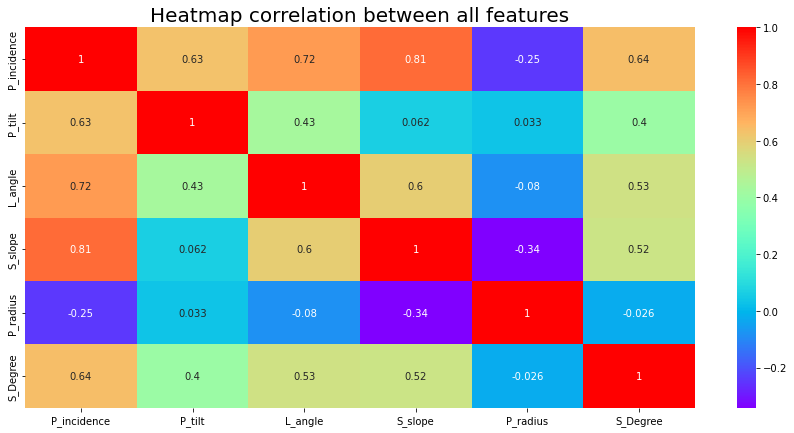

In [129]:
# Visualize a heatmap to understand correlation between all features for dataframe df
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot = True, cmap = 'rainbow')
plt.title("Heatmap correlation between all features", fontsize = 20);

#### Observations:

A.	Features having stronger correlation with correlation value

P_incidence	- Strong positive correlation with L_angle and S_slope.

B.	Features having weaker correlation with correlation value

P_radius - Has weak to no correlation with other features in the dataset.

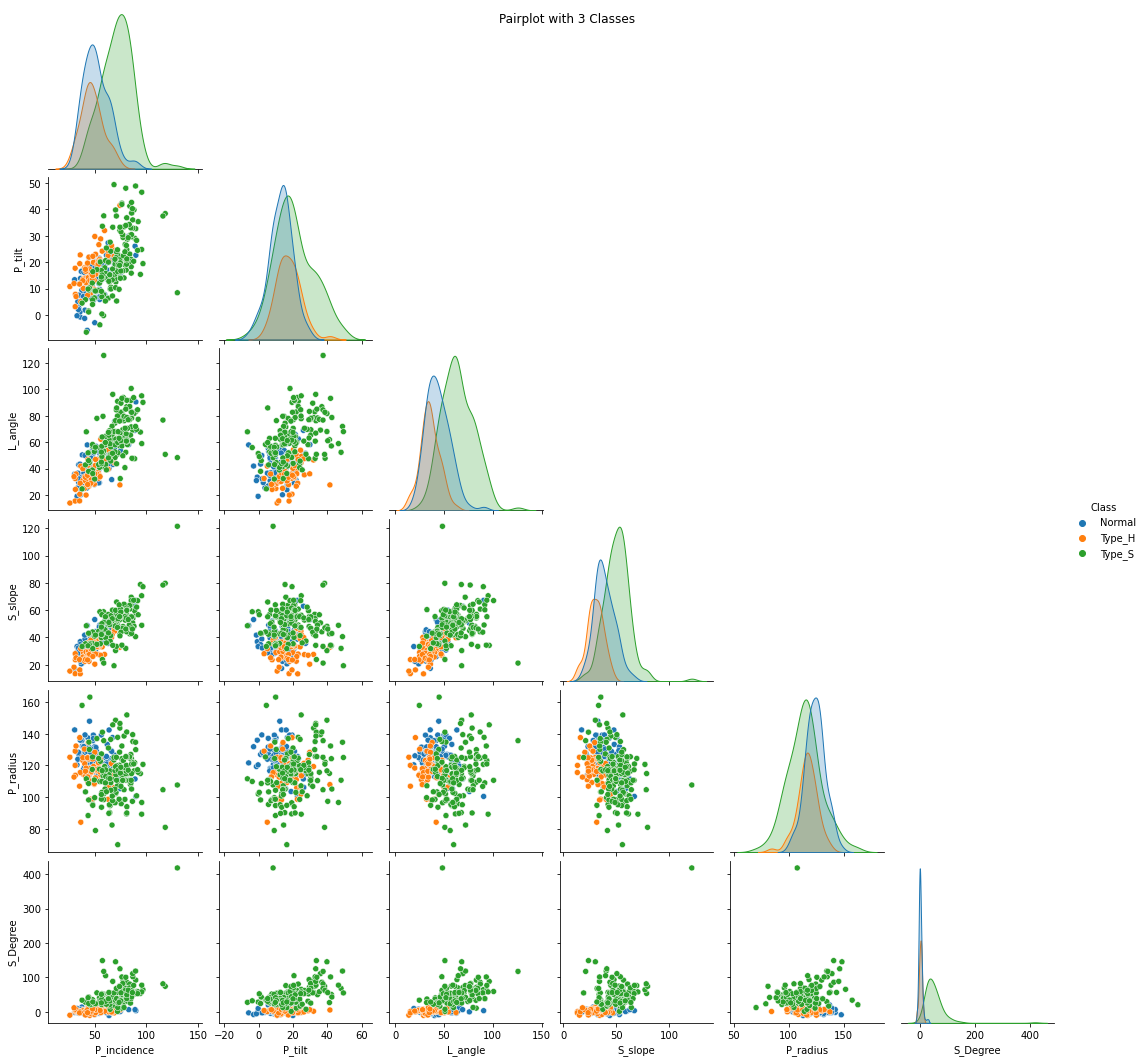

In [130]:
# Visualize a pairplot with 3 classes distinguished by colors and share insights for dataframe df
pp = sns.pairplot(data = df, hue = 'Class', corner = True)
pp.fig.suptitle("Pairplot with 3 Classes")
plt.show();

#### Observations:

Along the diagonal we can see distribution of variable for three claases are not same.

It is evident that there are more Type_S class values followed by Normal class and Type_H class values. 

P_incidence has postive realtionship with all variables except P_radius. Relationship is higher for S_slope and L_angle.

P_tilt has Higher Relationship with P_incidence and L_angle.There is no Relationship with s_slope and p_radius

L_angle has postive Relationship with p_tilt,s_slope and s_degree. It has no Relationship with P_radius

s_slope has positive Relationship with L_angle and s_degree

p_radius has no Relationship with s_degree,p_tilt,l_angle.

S_degree has no strong positive Relationship with any of the variables.

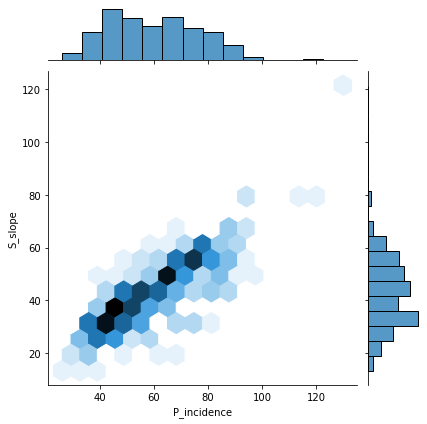

In [131]:
# Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights for dataframe df
sns.jointplot(data = df, x = 'P_incidence', y = 'S_slope', kind = 'hex');

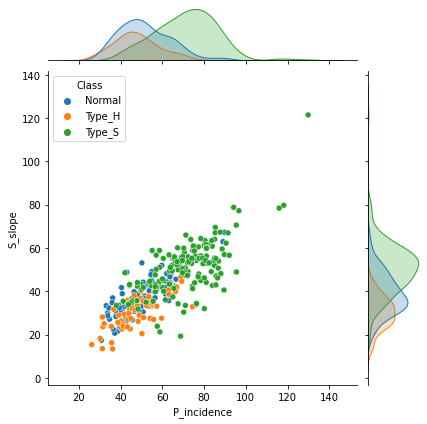

In [132]:
# Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights for dataframe df
sns.jointplot(data = df, x = 'P_incidence', y = 'S_slope', hue = 'Class', marker = 'o');

#### Observations:

Again, it is evident that there are more Type_S class values followed by Normal class and Type_H class values. 

In [133]:
# Visualize a boxplot to check distribution of the features and share insights for dataframe df
import plotly.graph_objects as go
fig = go.Figure()

for col in df.columns[:-1]:
  fig.add_trace(go.Box(x = df[col].values, name = df[col].name))
  
fig.update_layout(
    autosize = False,
    width = 1000,
    height = 500)

fig.show()

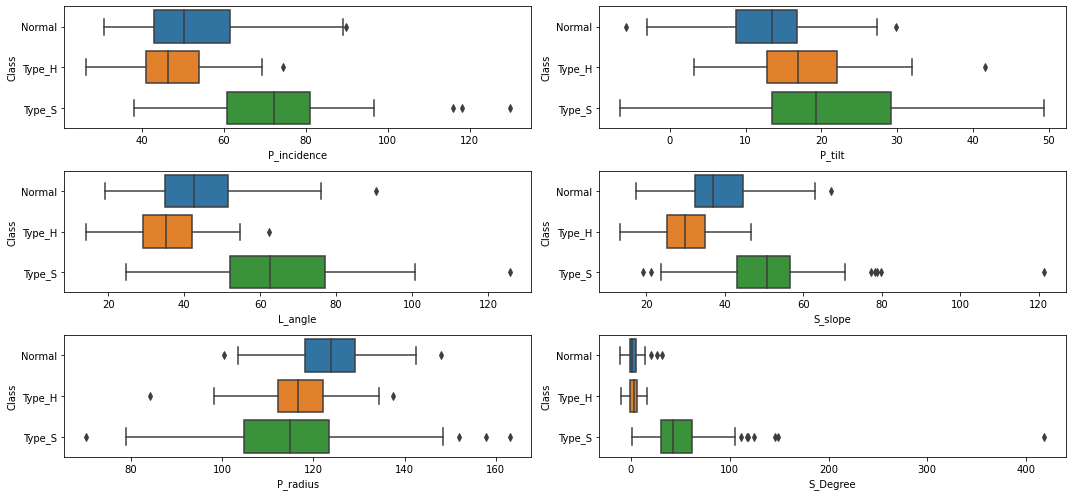

In [134]:
# Visualize a boxplot to check distribution of the features and share insights for dataframe df
plt.figure(figsize=(15,7))
index = 1
for col in df.columns[:-1]:
    plt.subplot(3,2,index)
    sns.boxplot(x = df[col], y = df.Class)
    index += 1;
plt.tight_layout()

#### Observations:

P_Incidence Value is larger for Type_S Class. We can see some extreme values as well. Normal Value is slightly higher than Type_H

Mean of Type_S is slightly higher. Few cases Normal and Type_H also has huge values.

L_Angle has higher value for Type_S Class. We can see Normal class has higher values compared to type_H class. Each class contains one outlier

S_slope has huge values for Type_S class. Normal class has high s_slope compared to Type_H.

We can see P_radius value is more for Normal Class. There are some extreme values for Type_s class. All classes have outliers at both ends.

S_Degree has extreme values for type_S Class. Few Normal class also has huge values for S_Degree.

## 4.	Model Building

In [135]:
#Encoding Target Variable
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])
df['Class'].value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

In [136]:
df.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
100,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
264,53.941658,9.306594,43.100498,44.635064,124.397821,25.082127,2
292,74.469082,33.283157,66.942101,41.185925,146.466001,124.984406,2
253,57.286945,15.149350,64.000000,42.137595,116.735387,30.341203,2
269,44.253476,1.101087,38.000000,43.152390,98.274107,23.910635,2


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    int32  
dtypes: float64(6), int32(1)
memory usage: 15.9 KB


In [138]:
# changing Class variable datatype to category
df['Class'] = df['Class'].astype('category')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   P_incidence  310 non-null    float64 
 1   P_tilt       310 non-null    float64 
 2   L_angle      310 non-null    float64 
 3   S_slope      310 non-null    float64 
 4   P_radius     310 non-null    float64 
 5   S_Degree     310 non-null    float64 
 6   Class        310 non-null    category
dtypes: category(1), float64(6)
memory usage: 15.1 KB


In [140]:
# Arrange data into independent variables and dependent variables
X = df.drop(labels = 'Class' , axis = 1)
y = df['Class']

In [141]:
X.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910


In [142]:
y.head().to_frame()

,Class
0,0
1,0
2,0
3,0
4,0


In [143]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
XScaled  = X.apply(zscore)  # convert all attributes to Z scale
XScaled.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,-1.277922,-0.057898,-0.907904,-1.597803,0.730468,-0.488288
1,-0.324010,0.142672,-0.017786,-0.522437,0.596124,-0.647896
2,-0.937559,-0.860412,-0.271475,-0.562386,0.849889,-0.568091
3,-0.707649,-0.009077,-0.212206,-0.901920,0.831811,-0.725568
4,-0.859732,-0.688835,-0.504914,-0.590377,0.921914,-0.791650


In [144]:
 XScaled.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,1.042177e-16,1.001617,-1.996010,-0.817398,-0.104925,0.719464,4.029206
P_tilt,310.0,2.096889e-16,1.001617,-2.411664,-0.688114,-0.118606,0.458116,3.191402
L_angle,310.0,1.980495e-16,1.001617,-2.047652,-0.806027,-0.127862,0.597549,3.984615
S_slope,310.0,2.829278e-17,1.001617,-2.207741,-0.716842,-0.040960,0.726941,5.855771
P_radius,310.0,-5.071212e-16,1.001617,-3.597963,-0.542383,0.026138,0.567621,3.395818
S_Degree,310.0,-1.277204e-16,1.001617,-0.996172,-0.658507,-0.387450,0.399768,10.460350


#### Observations:

Since, we have scaled independent variables to corresponding z-score, we can see that the Means come close to zero and Standard Deviations tend to 1.

In [145]:
# Split X and y into training and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size = 0.20, random_state = 1)

In [146]:
# Build kNN Model
KNN = KNeighborsClassifier(n_neighbors = 5 , weights = 'distance', metric = 'euclidean')

In [147]:
# Call Nearest Neighbour algorithm
KNN.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', weights='distance')

In [148]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will be assigned to the test data point
predicted_labels = KNN.predict(X_test)

In [149]:
# Classification Accuracy
print('Accuracy on Training data is', KNN.score(X_train, y_train))
print('Accuracy on Test data is', KNN.score(X_test, y_test))

Accuracy on Training data is 1.0
Accuracy on Test data is 0.7258064516129032


#### Observations:

Training Acuracy is 1.0 and Testing Accuracy is 0.72. 

The performance is less in test data. This is due to overfitting of data.

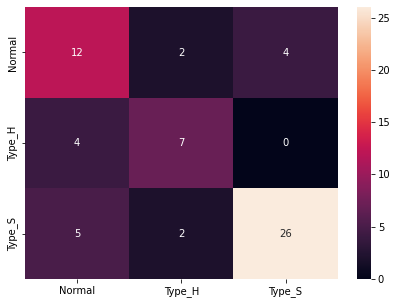

In [150]:
# Confusion Matrix 
cm = confusion_matrix(y_test, predicted_labels, labels = [0, 1, 2])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal", "Type_H", "Type_S"]],
                  columns = [i for i in ["Normal", "Type_H", "Type_S"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g')
plt.show()

#### Observations:

Our model predicts Type_S correctly most of the time.

Misclassification of labels are more when predicting Normal and Type_H classes.

In [151]:
#Classification Report
print("Classification  Matrix:\n", classification_report(y_test,predicted_labels))

Classification  Matrix:
               precision    recall  f1-score   support

           0       0.57      0.67      0.62        18
           1       0.64      0.64      0.64        11
           2       0.87      0.79      0.83        33

    accuracy                           0.73        62
   macro avg       0.69      0.70      0.69        62
weighted avg       0.74      0.73      0.73        62



#### Observations:

Precision for Normal class: It tells, out of all predicted normal class what fraction are predicted correctly

Recall(sensitivity or TPR) for Normal class: Out of all actual Normal class how much fraction we identified correctly

class 0 predicted correctly for 68% of time. similary for class 1 48% and class 2 98%

By F1 score we can say that precison and recall is balanced for class 0 by 60% and for class 1 by 56 %

We have maximum F1 score for class 2.

In [152]:
# Finding best K value
train_score = []
test_score = []
for k in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors = k , metric = 'euclidean' ) 
    KNN.fit(X_train, y_train)
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test, y_test))

In [153]:
fig = px.line(x = range(1,51), y = train_score, title = 'Train Score Accuracy')
fig.show()

#### Observations:

The training accuracy decreases with increasing k value

In [154]:
fig1 = px.line(x = range(1,51), y = test_score, title = 'Test Score Accuracy')
fig1.show()

#### Observations:

The maximum accuracy varies a lot for different k values. Let's consider values for k up until 20 to decide on the optimal k value.

In [155]:
k = np.arange(1, 20, 2) #[1,3,5,7,9,11,13,15,17,19]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors = i, metric = 'euclidean')
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k = {} is {}:'.format(i, KNN.score(X_train, y_train)))
    print('Accuracy on Test data for k = {} is {}:'.format(i, KNN.score(X_test, y_test)))
    print('\n')

Accuracy on Training data for k = 1 is 1.0:
Accuracy on Test data for k = 1 is 0.8225806451612904:


Accuracy on Training data for k = 3 is 0.8870967741935484:
Accuracy on Test data for k = 3 is 0.7096774193548387:


Accuracy on Training data for k = 5 is 0.8467741935483871:
Accuracy on Test data for k = 5 is 0.7258064516129032:


Accuracy on Training data for k = 7 is 0.8346774193548387:
Accuracy on Test data for k = 7 is 0.7580645161290323:


Accuracy on Training data for k = 9 is 0.8467741935483871:
Accuracy on Test data for k = 9 is 0.7419354838709677:


Accuracy on Training data for k = 11 is 0.8387096774193549:
Accuracy on Test data for k = 11 is 0.7096774193548387:


Accuracy on Training data for k = 13 is 0.8064516129032258:
Accuracy on Test data for k = 13 is 0.7096774193548387:


Accuracy on Training data for k = 15 is 0.8024193548387096:
Accuracy on Test data for k = 15 is 0.7419354838709677:


Accuracy on Training data for k = 17 is 0.8104838709677419:
Accuracy on Test data

#### Observations:

The maximum accuracy in test data is achieved when k = [7 , 17, 19]

In [156]:
k =  [7 , 17, 19]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors = i, metric = 'euclidean')
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    print("classification  Matrix k = {}:\n{}".format(i, classification_report(y_test, predicted_labels)))

classification  Matrix k = 7:
              precision    recall  f1-score   support

           0       0.60      0.67      0.63        18
           1       0.75      0.82      0.78        11
           2       0.87      0.79      0.83        33

    accuracy                           0.76        62
   macro avg       0.74      0.76      0.75        62
weighted avg       0.77      0.76      0.76        62

classification  Matrix k = 17:
              precision    recall  f1-score   support

           0       0.63      0.67      0.65        18
           1       0.67      0.73      0.70        11
           2       0.87      0.82      0.84        33

    accuracy                           0.76        62
   macro avg       0.72      0.74      0.73        62
weighted avg       0.77      0.76      0.76        62

classification  Matrix k = 19:
              precision    recall  f1-score   support

           0       0.63      0.67      0.65        18
           1       0.67      0.73    

#### Observations:

If we check the Classification report then, better prediction values were achieved when k = 7.

### K-Fold CV for finding best model

In [157]:
LinR_model = LinearRegression()
LogR_model = LogisticRegression()
KNN_model = KNeighborsClassifier(n_neighbors = 7)
GN_model = GaussianNB()
svc_model_linear = SVC(kernel = 'linear', C = 0.1, gamma = 1)
svc_model_rbf = SVC(kernel = 'rbf', degree = 2, C = 0.1)
svc_model_poly = SVC(kernel = 'poly', degree = 2, C = 0.1, gamma = 1)

LinR: nan (nan)
LogR: 0.854839 (0.073913)
KNN: 0.825806 (0.059830)
NB: 0.822581 (0.076677)
SVM-linear: 0.848387 (0.066188)
SVM-poly: 0.777419 (0.074194)
SVM-rbf: 0.758065 (0.084427)


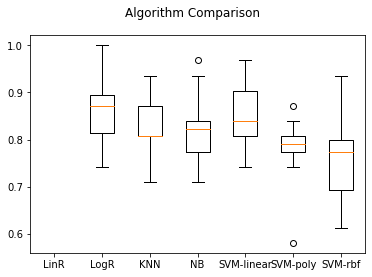

In [158]:
seed = 1
# prepare models
models = []
models.append(('LinR', LinR_model))
models.append(('LogR', LogR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-linear', svc_model_linear))
models.append(('SVM-poly', svc_model_poly))
models.append(('SVM-rbf', svc_model_rbf))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed, shuffle = True)
    cv_results = model_selection.cross_val_score(model, X, y, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Observations:

We can see that Logistic Regression is a better algorithm for the unscaled dataset because it has the highest accuracy and least Standard deviation, followed KNN and SVM-Linear models.

### Let's check with scaled features to see whether there is an improvement in the model parameters

LinR: nan (nan)
LogR: 0.851613 (0.076609)
KNN: 0.787097 (0.094819)
NB: 0.822581 (0.076677)
SVM-linear: 0.841935 (0.076947)
SVM-poly: 0.525806 (0.108964)
SVM-rbf: 0.745161 (0.106452)


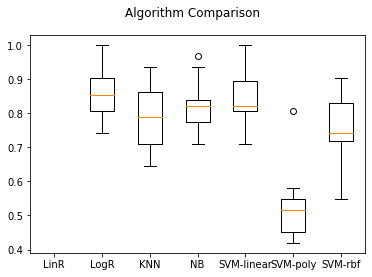

In [159]:
seed = 1
# prepare models
models = []
models.append(('LinR', LinR_model))
models.append(('LogR', LogR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-linear', svc_model_linear))
models.append(('SVM-poly', svc_model_poly))
models.append(('SVM-rbf', svc_model_rbf))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed, shuffle = True)
    cv_results = model_selection.cross_val_score(model, XScaled, y, cv = kfold, scoring = scoring) # Xscaled
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Observations: 

We can see that again, Logistic Regression is a better algorithm for the scaled dataset because it has the highest accuracy and least Standard deviation, followed by SVM-Linear and Naive Bayes models.

## 5. Conclusion and Performance Improvement

#### Conclusion:
We can select the final model as Logistic Regression as it performs well with both training and testing data.

Logistic regression performed well in k-fold cross validation as well.

Deviation also less in logistic regression.

Scaling improved the performance of the model.

#### Performance Improvement:
Suggesting to collect data equally for all the classes for the target variable Class.

Clear description on each variables may help to better understand the problem statement since it's related to medical domain.

## End of Part A

## Part B

•	DOMAIN:  Banking, Marketing
•	CONTEXT: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base where majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign.
•	DATA DICTIONARY:
1.	Team: Team’s name
2.	ID: Customer ID
3.	Age: Customer’s approximate age.
4.	CustomerSince: Customer of the bank since. [unit is masked]
5.	HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
6.	ZipCode: Customer’s zip code.
7.	HiddenScore: A score associated to the customer which is masked by the bank as an IP.
8.	MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
9.	Level: A level associated to the customer which is masked by the bank as an IP.
10.	Mortgage: Customer’s mortgage. [unit is masked]
11.	Security: Customer’s security asset with the bank. [unit is masked]
12.	FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
13.	InternetBanking: if the customer uses internet banking.
14.	CreditCard: if the customer uses bank’s credit card.
15.	LoanOnCard: if the customer has a loan on credit card.

•	PROJECT OBJECTIVE: Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert using the historical dataset.
•	STEPS AND TASK [30 Marks]:
1.	Data Understanding and Preparation: [5 Marks]
A.	Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables. [1 Marks]
B.	Print shape and Column Names and DataTypes of both the Dataframes. [1 Marks]
C.	Merge both the Dataframes on ‘ID’ feature to form a single DataFrame [2 Marks]
D.	Change Datatype of below features to ‘Object’ [1 Marks]
‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.
[Reason behind performing this operation:- Values in these features are binary i.e. 1/0. But DataType is ‘int’/’float’ which is not expected.]
2.	Data Exploration and Analysis: [5 Marks]
A.	Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights. [2 Marks]
B.	Check the percentage of missing values and impute if required. [1 Marks]
C.	Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]
[Unexpected values means if all values in a feature are 0/1 then ‘?’, ‘a’, 1.5 are unexpected values which needs treatment ]
3.	Data Preparation and model building: [10 Marks]
A.	Split data into X and Y. [1 Marks]
[Recommended to drop ID & ZipCode. LoanOnCard is target Variable]
B.	Split data into train and test. Keep 25% data reserved for testing. [1 Marks]
C.	Train a Supervised Learning Classification base model - Logistic Regression. [2 Marks]
D.	Print evaluation metrics for the model and clearly share insights. [1 Marks]
E.	Balance the data using the right balancing technique. [2 Marks]
i.	Check distribution of the target variable
ii.	Say output is class A : 20% and class B : 80%
iii.	Here you need to balance the target variable as 50:50.
iv.	Try appropriate method to achieve the same.
F.	Again train the same previous model on balanced data. [1 Marks]
G.	Print evaluation metrics and clearly share differences observed. [2 Marks]
4.	Performance Improvement: [10 Marks]
A.	Train a base model each for SVM, KNN. [4 Marks]
B.	Tune parameters for each of the models wherever required and finalize a model. [3 Marks] (Optional: Experiment with various Hyperparameters - Research required)
C.	Print evaluation metrics for final model. [1 Marks]
D.	Share improvement achieved from base model to final model. [2 Marks]

## 1. Data Importing

In [160]:
# Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables
df1 = pd.read_csv("Data1.csv")
df2 = pd.read_csv("Data2.csv")

In [161]:
# checking a data sample in dataframe df1
df1.sample(5)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
2751,2752,47,23,32,92251,4,0.6,1
400,401,36,10,179,94542,3,6.6,1
2506,2507,66,42,39,94590,1,1.9,2
2462,2463,52,28,23,95828,3,0.4,1
724,725,64,38,92,94086,1,2.0,1


In [162]:
# checking a data sample in dataframe df2
df2.sample(5)

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
1691,1692,0,0,0,0,1,0.0
1270,1271,0,0,0,0,1,0.0
3965,3966,0,0,0,1,0,0.0
796,797,0,0,0,0,0,0.0
2552,2553,0,0,0,0,0,0.0


## 2. Data Preparation and Exploration

In [163]:
# dataframe df1 shape
df1.shape

(5000, 8)

In [164]:
# dataframe df1 information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


In [165]:
# dataframe df2 shape
df2.shape

(5000, 7)

In [166]:
# dataframe df2 information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           4980 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


In [167]:
# Merge both the Dataframes on ‘ID’ feature to form a single DataFrame
df = df1.merge(df2, left_on = 'ID', right_on = 'ID') # since ID is common in both dataframes
df.sample(5)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
99,100,66,41,15,91711,3,0.1,3,0,0,0,1,0,0.0
2626,2627,53,27,59,92038,2,0.8,3,0,0,0,1,0,0.0
4422,4423,57,31,164,94607,2,3.8,3,422,0,1,1,1,1.0
4401,4402,60,35,42,91902,3,1.5,1,0,0,0,0,1,0.0
1888,1889,36,10,93,94305,1,2.8,3,0,0,0,1,0,0.0


In [168]:
# dataframe df shape
df.shape

(5000, 14)

In [169]:
# dataframe df information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [170]:
# Changing datatypes of categorical features
col = ['HiddenScore','Level','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']
for i in col:
    df[i] = df[i].astype('category')

In [171]:
# dataframe df information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   5000 non-null   int64   
 1   Age                  5000 non-null   int64   
 2   CustomerSince        5000 non-null   int64   
 3   HighestSpend         5000 non-null   int64   
 4   ZipCode              5000 non-null   int64   
 5   HiddenScore          5000 non-null   category
 6   MonthlyAverageSpend  5000 non-null   float64 
 7   Level                5000 non-null   category
 8   Mortgage             5000 non-null   int64   
 9   Security             5000 non-null   category
 10  FixedDepositAccount  5000 non-null   category
 11  InternetBanking      5000 non-null   category
 12  CreditCard           5000 non-null   category
 13  LoanOnCard           4980 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 347.6 KB


In [172]:
# Check missing values in dataframe df
df.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

#### Target variable LoanOnCard has few missing records. Since, LoanOnCard is a target(also categorical) variable that we can't impute values for and has few missing values, we can drop the missing records.

In [173]:
# Drop the null values in dataframe df
df.dropna(inplace=True)

In [174]:
# Check missing values in dataframe df
df.isnull().sum().sum()

0

#### We can drop ID column as it would not be useful in model building.

In [175]:
# Drop column ID in dataframe df
df.drop('ID', axis = 1, inplace = True)

In [176]:
# checking a data sample in dataframe df2
df.sample(5)

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
1131,57,27,90,91709,2,4.5,3,0,0,0,1,0,0.0
1399,40,16,69,92009,4,2.4,1,0,0,0,1,0,0.0
294,35,9,55,94536,1,2.0,1,0,0,0,1,0,0.0
4418,59,34,145,95125,4,1.8,1,198,0,0,1,0,1.0
1457,42,16,25,94304,2,0.8,3,0,0,0,0,1,0.0


## 3. Data Analysis & Visulaization

In [177]:
# Check 5-point summary of the DataFrame df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4980.0,45.352610,11.464212,23.0,35.0,45.0,55.000,67.0
CustomerSince,4980.0,20.117671,11.468716,-3.0,10.0,20.0,30.000,43.0
HighestSpend,4980.0,73.852410,46.070090,8.0,39.0,64.0,98.000,224.0
ZipCode,4980.0,93152.420482,2123.660073,9307.0,91911.0,93407.0,94608.000,96651.0
MonthlyAverageSpend,4980.0,1.939536,1.750006,0.0,0.7,1.5,2.525,10.0
Mortgage,4980.0,56.589759,101.836758,0.0,0.0,0.0,101.000,635.0


#### Observations:

Mean and Median of Age, CustomerSince column is nearly equal, so there wont be any skewness.

Mean is greater than Median in HighestSpend and MonthlyAverageSpend, so Positive skewness will exist.

We can see high fluctuation in Mortgage column. 50% of data has zero values but maximum value is 635. This is hugely affected by outliers.

Zipcode has higher mean and std, however we need to check if we can consider Zipcode as a descriptive categorical variable.

### Univariate Analysis

#### Distribution of Numerical features

 Total Number of outliers in Age: 0
 Total Number of outliers in CustomerSince: 0
 Total Number of outliers in HighestSpend: 96
 Total Number of outliers in ZipCode: 1
 Total Number of outliers in MonthlyAverageSpend: 324
 Total Number of outliers in Mortgage: 291


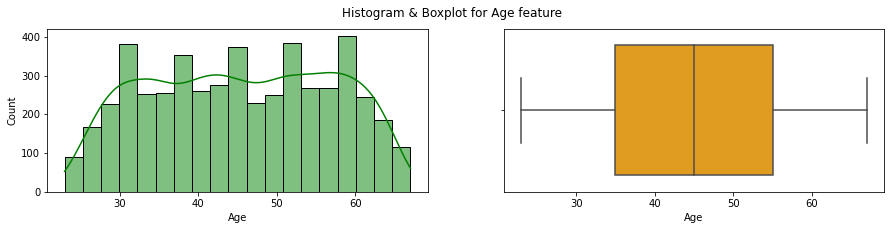

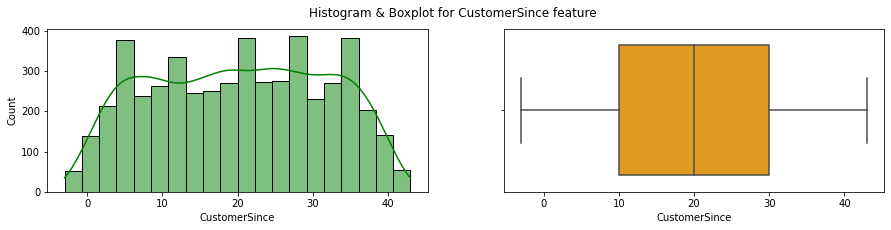

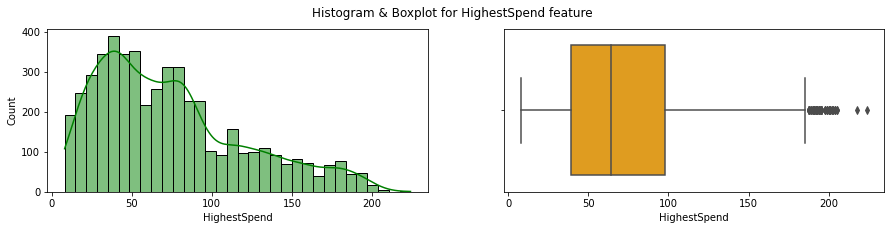

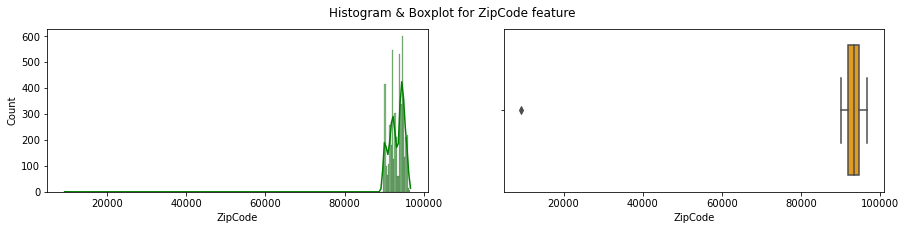

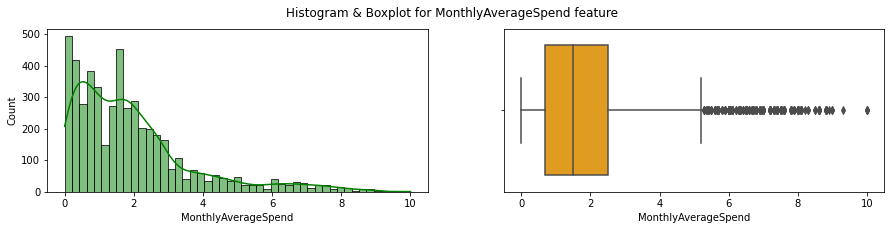

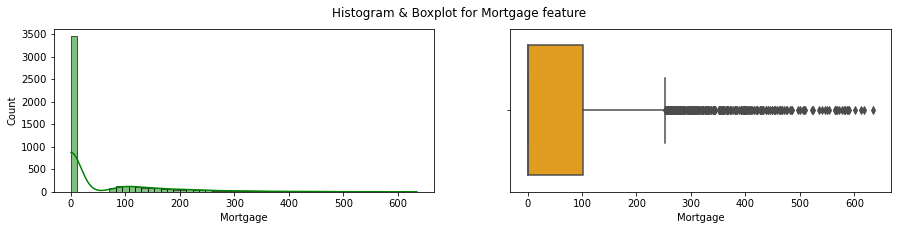

In [178]:
num_cols = df.select_dtypes(exclude = 'category').columns.to_list()

for i in num_cols:
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,3))
    plt.suptitle("Histogram & Boxplot for {} feature".format(i), ha = 'center')
    sns.histplot(data = df, x = i, ax = ax[0], fill = True, kde = True, color = 'Green')
    sns.boxplot(data = df, x = i, ax = ax[1], color = 'Orange')
    #checking count of outliers
    q25, q75 = np.percentile(df[i], 25), np.percentile(df[i], 75)
    IQR = q75 - q25
    Threshold = IQR * 1.5
    lower, upper = q25 - Threshold, q75 + Threshold
    Outliers = [i for i in df[i] if i < lower or i > upper]
    print('{} Total Number of outliers in {}: {}'.format('\033[1m',i,len(Outliers)))

#### Observations:

Mortgage - Values are mostly spreaded around 0 to 100, and outliers are preset above 260+ approximately.

MonthlyAverageSpend - Values are distributed around 0 to 10, and most values are between 1 & 3, with right skewness. 

ZipCode - Most customers sampled are from a closed sample area, except one.

HighestSpend - Values are between 0 and 220, with right skewness.

CustomerSince - Normally distributed with mean as 20. Most customers are between 10 and 30.

Age - Most customers are between the age 35 to 55.

#### Distribution of Categorical features

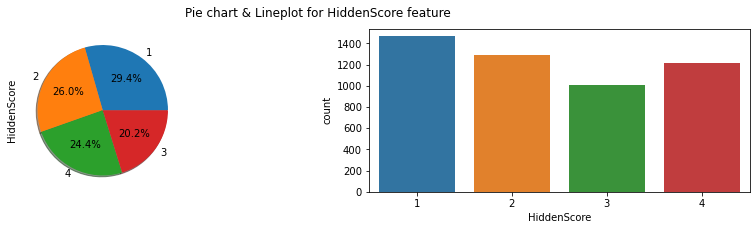

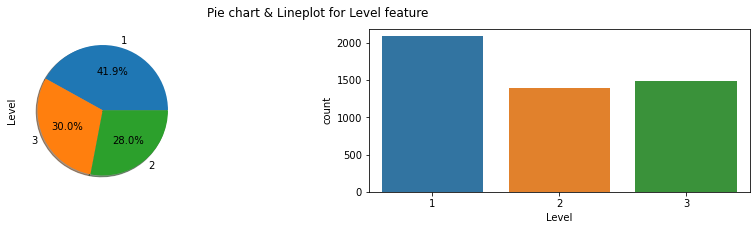

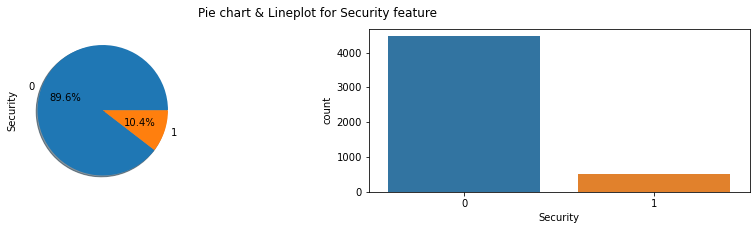

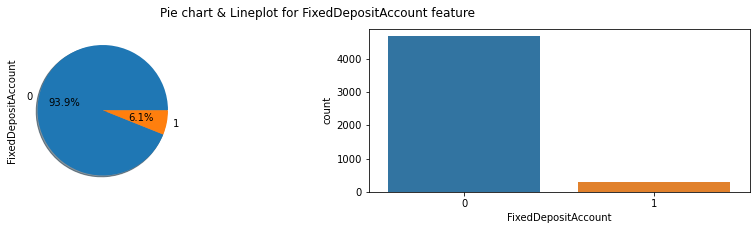

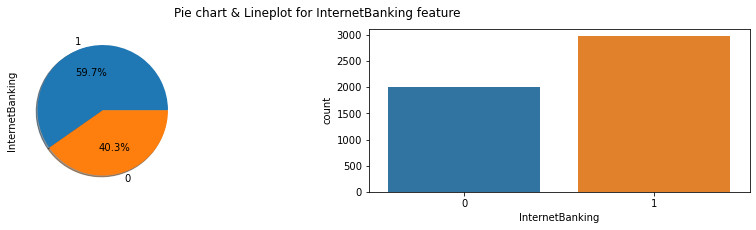

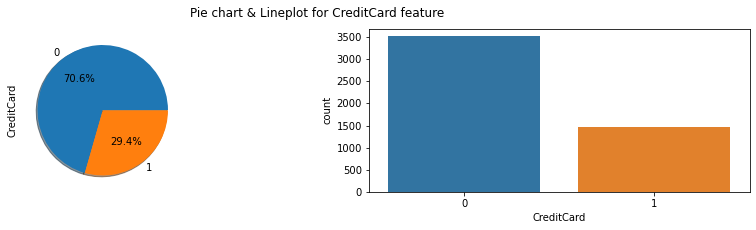

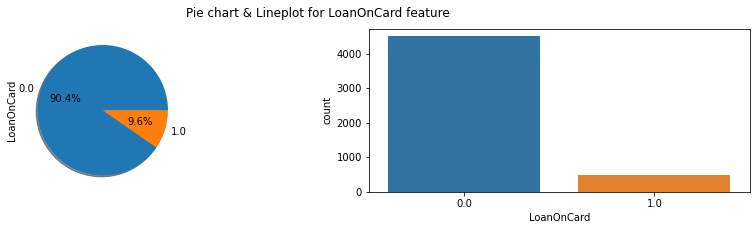

In [179]:
cat_cols = df.select_dtypes(include = 'category').columns.to_list()

for i in cat_cols:
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,3))
    plt.suptitle("Pie chart & Lineplot for {} feature".format(i), ha = 'center')
    df[i].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[0], shadow = True)
    sns.countplot(data = df, x = i, ax = ax[1])

#### Observations:

Hidden score - is quite evenly distributed between 1, 2, 3 & 4.

Level - is distributed between 1,2 & 3, with most customers in Level 1.

Security - value is 0 or 1. most cases it is 0.

FixedDeposit - 1 or 0 for yes or no, most customers have a FixedDeposit.

InternetBanking - 1 or 0 for yes or no, most customers use Internetbanking.

CreditCard - 1 or 0 for yes or no, most customers don't have a Creditcard.

LoanOnCard - 1 or 0 for yes or no, most customers don't have a loan on card.

#### Also, we don't see any unexpected values in the Categorical variables that need to be dropped or imputed with the best suitable value.

### Bivariate Analysis

### Considering LoanOnCard as the Target variable

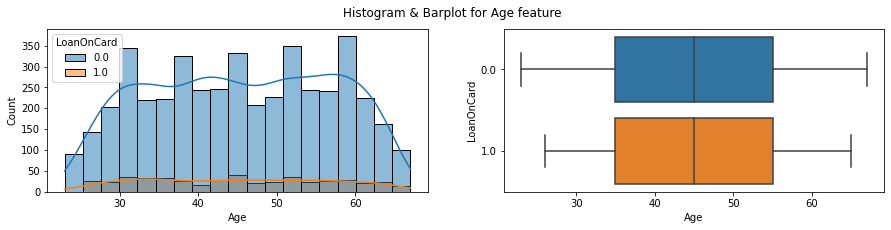

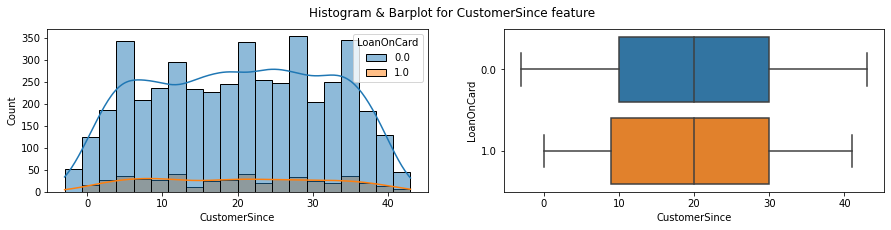

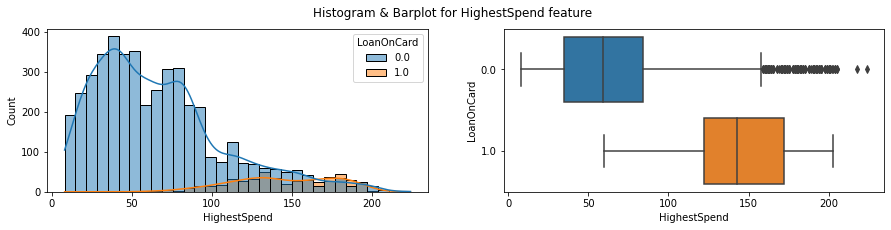

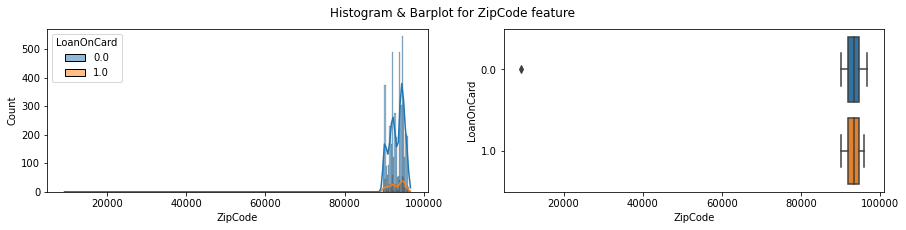

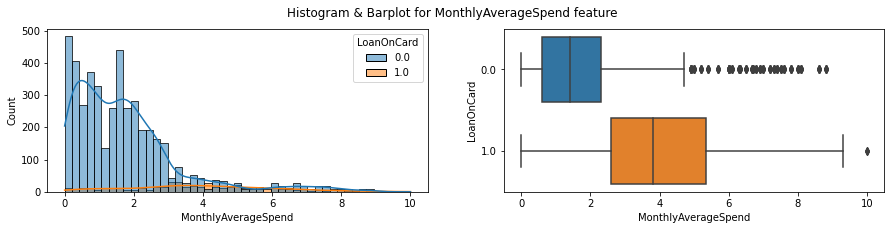

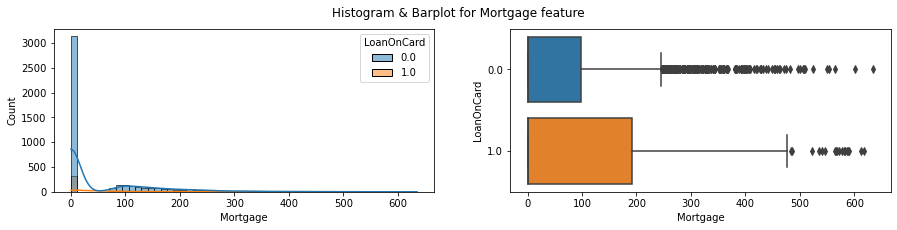

In [180]:
# Target vs Numerical features
for i in num_cols:
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,3))
    plt.suptitle("Histogram & Barplot for {} feature".format(i), ha = 'center')
    sns.histplot(data = df, x = i, ax = ax[0], fill = True, kde = True, hue = 'LoanOnCard')
    sns.boxplot(data = df, x = i, ax = ax[1], y = 'LoanOnCard')

#### Observations:

Age - is assumed to be evenly split across LoanOnCard. There is no much difference other than min and max values.

CustomerSince - same as Age, there is no much difference in old or new customer in terms of LoanOnCard.

HighestSpend - customer having LoanOnCard have a higher highest spend, against Lower spend for the customers who have no LoanOnCard. There are outliers in the Highestspend in terms of no LoanOnCard.

ZipCode - doesn't make much difference, other than the outlier value 0 which needs to be handled.

MonthlyAverageSpend - customers having LoanOnCard have higher MonthlyAverageSpend compared to no loan customers.

Mortgage - Mortgage value is merely starting at 0, however the customers having loan on card have high numbers.

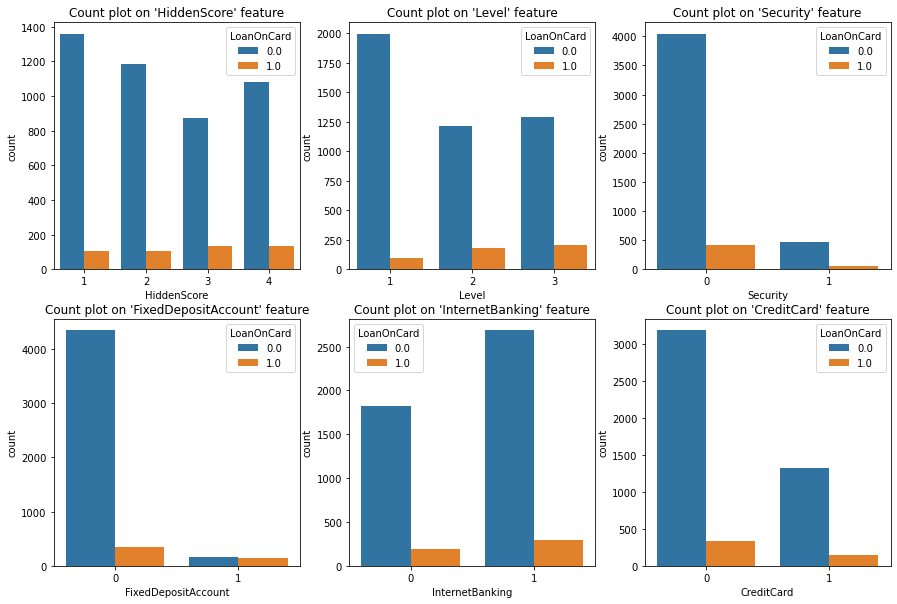

In [181]:
# Target vs Categorical features
cat = df.select_dtypes(include = 'category').columns.to_list()
cat.remove('LoanOnCard')
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15,10))
ax = ax.flatten()
j = 0
for i in cat:
    ax[j].set_title("Count plot on '{}' feature".format(i))
    sns.countplot(data = df, x = i, ax = ax[j], hue = 'LoanOnCard')
    j = j+1

#### Observations:

HiddenScore - feature has similar count for all classes for LoanOnCard.

Level - Level count is similarly distributed for both classes.

CreditCard - count of people having credit card is less, in which LoanOnCard distribution is also low.

FixedDepositAccount - People having FixedDeposit, have nearly equal distribution on LoanOnCard. However, people who have no Fixed deposits have more numbers in LoanOnCard.

InternetBanking - Customers having Internet banking have LoanOnCard is slightly higher than no InternetBanking.

CreditCard - Customers having no credit cards also opted for LoanOncard, which is higher in number compared to customers having credit card. However, proportion may defer.

### Multivariate Analysis

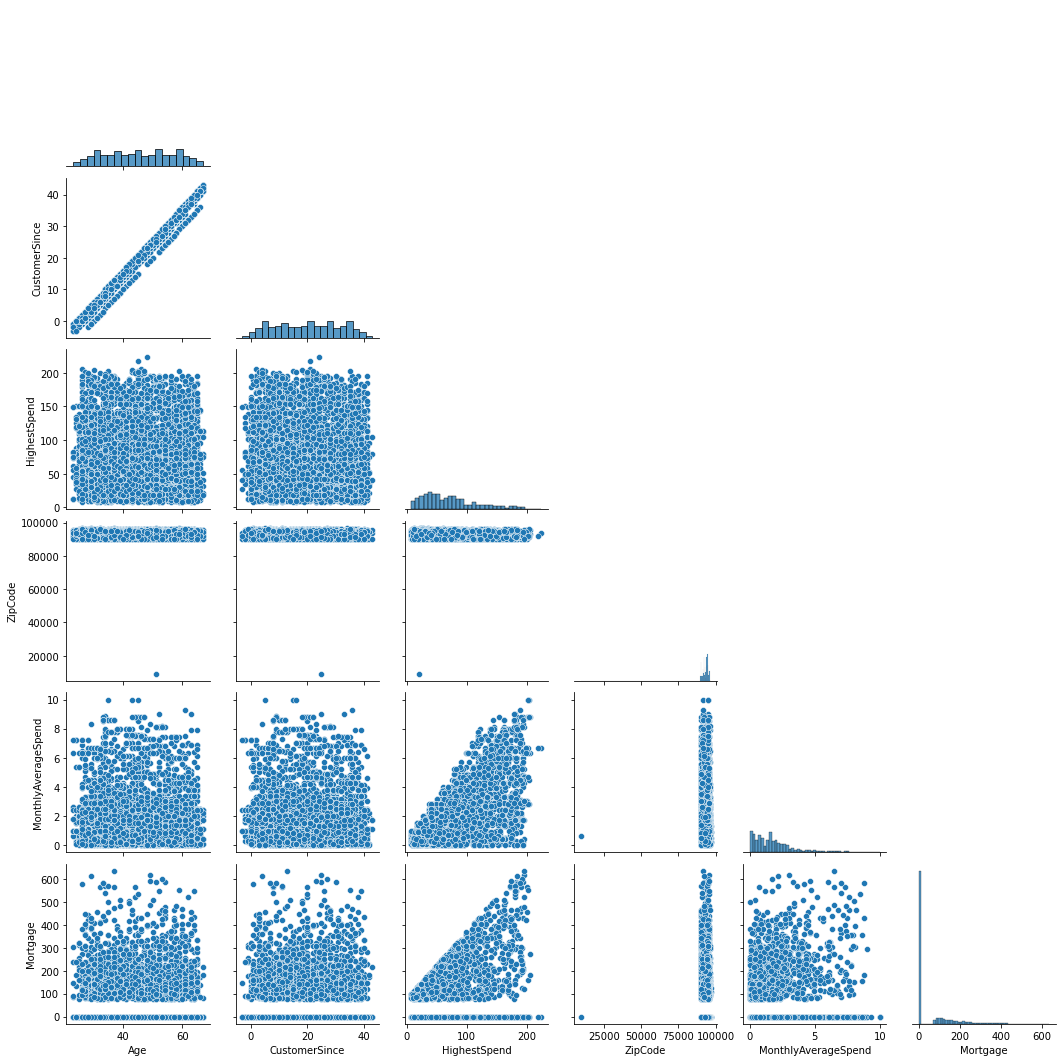

In [182]:
# Plotting the pairplot for dataframe df
sns.pairplot(df , corner = True);

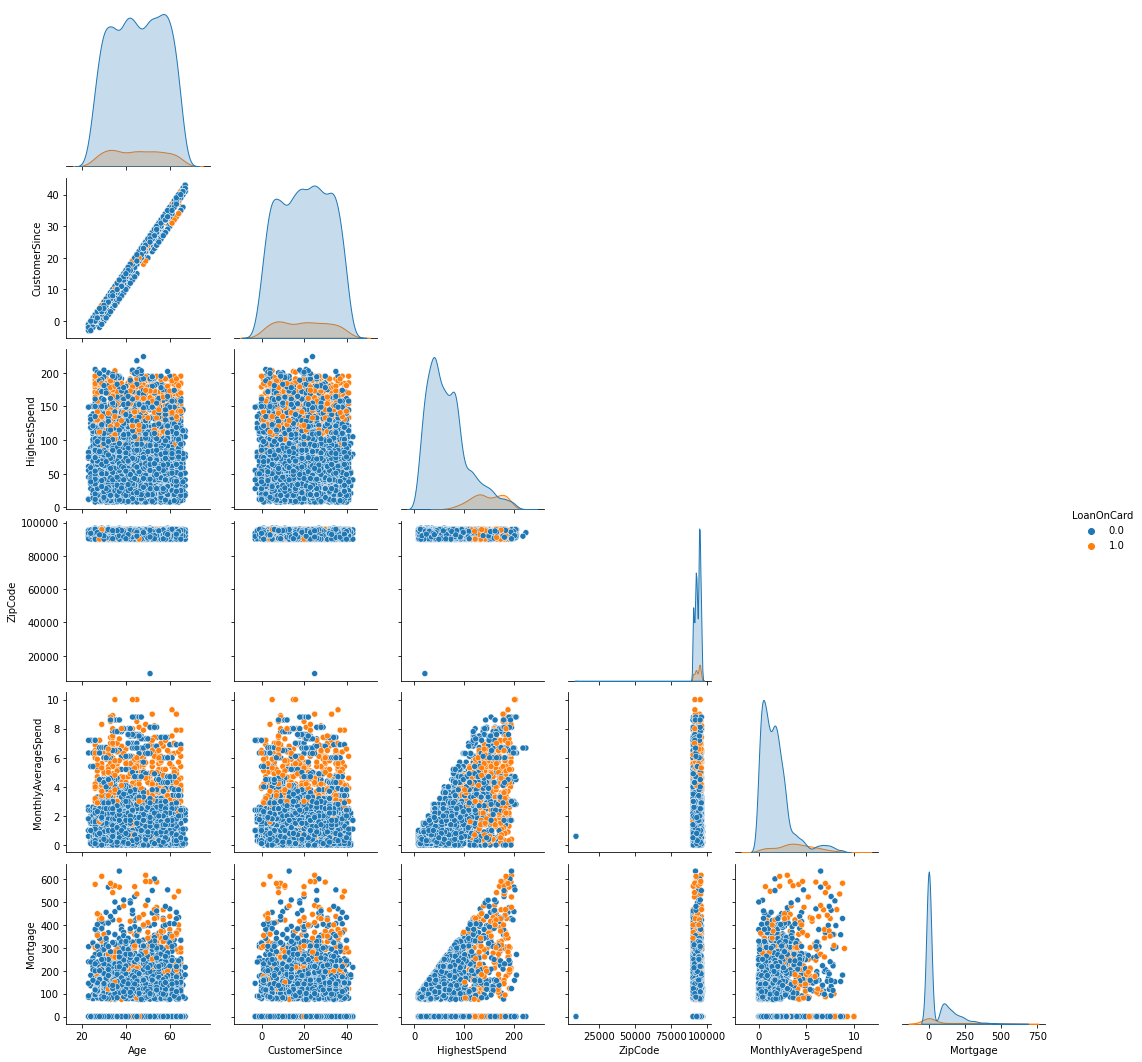

In [183]:
# Plotting the pairplot for dataframe df w.r.t LoanOnCard
sns.pairplot(df, hue = 'LoanOnCard' , corner = True);

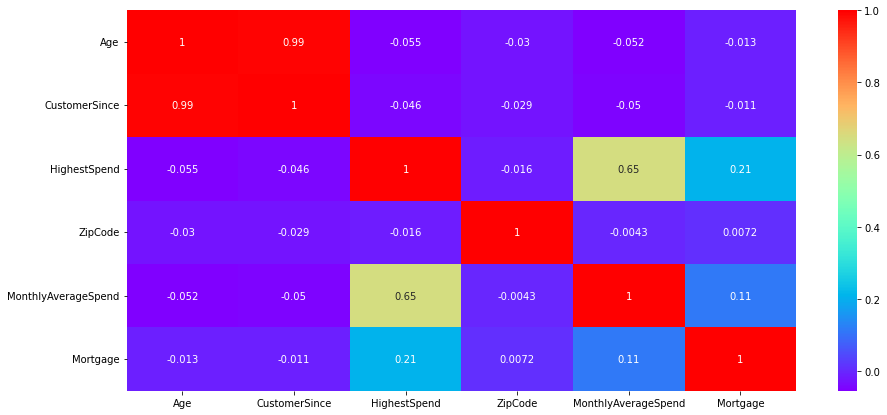

In [184]:
# Plotting the heat map for dataframe df
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot = True, cmap = 'rainbow');

### Hypothesis Testing

In [185]:
# Grouping values by LoanOnCard for dataframe df
df.groupby(by = ['LoanOnCard']).mean()

,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
LoanOnCard,,,,,,
0.0,45.383111,20.146889,66.290444,93152.337111,1.729849,51.869111
1.0,45.066667,19.843750,144.745833,93153.202083,3.905354,100.845833


#### Observations:

There is no difference in Age in terms of LoanOnCard. Both mean values are near 45.

CustomerSince feature is also more or less similar with just 1 value difference. However, we will do T-Test to check if it is significantly same.

#### Hypothesis: 

H0 - Independent features have no impact on the dependent feature(LoanOnCard)

H1 - Independent features have impact on the dependent feature(LoanOnCard)

In [186]:
# Checking the Hypothesis test for Numerical features
#from scipy.stats import ttest_ind
alpha = 0.05 # significance level
for i in num_cols:
    sts, p_value = ttest_ind(df[df['LoanOnCard'] == 0][i], df[df['LoanOnCard'] == 1 ][i])
    if p_value < alpha:
        print("P_value: {:.2f} , Reject Null Hypothesis: Feature {} has impact on LoanOnCard".format(p_value, i))
    else:
        print("P_value: {:.2f} , Fail to reject Null Hypothesis: Feature {} has no impact on LoanOnCard".format(p_value, i))

P_value: 0.57 , Fail to reject Null Hypothesis: Feature Age has no impact on LoanOnCard
P_value: 0.58 , Fail to reject Null Hypothesis: Feature CustomerSince has no impact on LoanOnCard
P_value: 0.00 , Reject Null Hypothesis: Feature HighestSpend has impact on LoanOnCard
P_value: 0.99 , Fail to reject Null Hypothesis: Feature ZipCode has no impact on LoanOnCard
P_value: 0.00 , Reject Null Hypothesis: Feature MonthlyAverageSpend has impact on LoanOnCard
P_value: 0.00 , Reject Null Hypothesis: Feature Mortgage has impact on LoanOnCard


#### Observations:

Features - Age, CustomerSince & ZipCode have no impact on the Target Variable LoanOnCard. Therefore, we can consider removing the features in model building.

In [187]:
# Checking the Hypothesis test for Categorical features
#from scipy.stats import chi2_contingency
for i in cat:
    crosstab = pd.crosstab(df['LoanOnCard'], df[i])
    sts, p_value,_,_ = chi2_contingency(crosstab)
    if p_value < alpha:
        print("P_value: {:.2f} , Reject Null Hypothesis: Feature {} has impact on LoanOnCard Classes".format(p_value, i))
    else:
        print("P_value: {:.2f} , Fail to reject Null Hypothesis: Feature {} has no impact on LoanOnCard Classes".format(p_value, i))

P_value: 0.00 , Reject Null Hypothesis: Feature HiddenScore has impact on LoanOnCard Classes
P_value: 0.00 , Reject Null Hypothesis: Feature Level has impact on LoanOnCard Classes
P_value: 0.14 , Fail to reject Null Hypothesis: Feature Security has no impact on LoanOnCard Classes
P_value: 0.00 , Reject Null Hypothesis: Feature FixedDepositAccount has impact on LoanOnCard Classes
P_value: 0.71 , Fail to reject Null Hypothesis: Feature InternetBanking has no impact on LoanOnCard Classes
P_value: 0.90 , Fail to reject Null Hypothesis: Feature CreditCard has no impact on LoanOnCard Classes


#### Observations:

Features - Security, InternetBanking, CreditCard have no impact on the Target Variable LoanOnCard. Therefore, we can consider removing the features in model building.

In [188]:
df = df.drop(['Security','InternetBanking','CreditCard','Age','CustomerSince','ZipCode'], axis=1)
df.sample(5)

,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,FixedDepositAccount,LoanOnCard
1992,38,2,0.8,1,0,0,0.0
2522,145,2,6.9,1,0,0,0.0
828,28,4,1.0,1,75,0,0.0
3202,25,2,0.3,1,0,0,0.0
1662,84,4,0.1,2,0,0,0.0


## 4. Data Pre-processing

In [189]:
# Checking on Target Imbalance
df['LoanOnCard'].value_counts().to_frame()

,LoanOnCard
0.0,4500
1.0,480


#### Observations:

There is huge imbalance in target variable.

If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model. Most of the predictions will correspond to the majority class and will treat the minority class features as noise in the data and ignore them. This will result in a High bias in the model.

A widely adopted technique for dealing with highly unbalanced datasets is called resampling.

Two widely used resampling methods are:

Undersampling: It is the process where you randomly delete some of the observations from the majority class in order to match the numbers with the minority class.

Oversampling: It is the process of generating synthetic data that tries to randomly generate a sample of the attributes from observations in the minority class.

#### Here can use oversampling because undersampling may remove important information from the dataset.

## 5. Model training, testing and tuning:

### Predictors and Target

In [190]:
# Arrange data into independent variables and dependent variables
X = df.drop(columns = 'LoanOnCard')
y = df['LoanOnCard'] #target

In [191]:
X.sample(5)

,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,FixedDepositAccount
1740,59,1,2.4,1,0,1
2889,33,3,1.9,2,144,0
673,22,1,0.5,3,85,0
1164,94,3,3.8,2,327,1
2685,101,4,2.1,3,0,0


In [192]:
y.sample(5).to_frame()

,LoanOnCard
2244,0.0
4534,0.0
2245,0.0
3064,0.0
2150,0.0


### Building the model without sampling first

In [193]:
# Split X and y into training and test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

### Logistic Regression Model

In [194]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:', logit.score(X_train, y_train))
print('Accuracy on Test data:', logit.score(X_test, y_test))

Accuracy on Training data: 0.9464524765729585
Accuracy on Test data: 0.9453815261044177


94.6% accuracy on Training set and 93.5% accuracy on Test set.

Here training set accuracy and testing accuracy are balanced when model is built without sampling and accuracy is good.

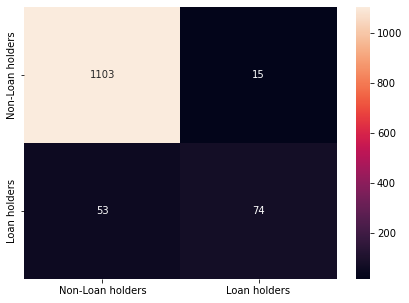

In [195]:
# Confusion Matrix
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True , fmt = 'g')
plt.show()

In [196]:
# Classification Matrix
print("Classification  Matrix:\n", classification_report(y_test, logit_pred))

Classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1118
         1.0       0.83      0.58      0.69       127

    accuracy                           0.95      1245
   macro avg       0.89      0.78      0.83      1245
weighted avg       0.94      0.95      0.94      1245



Here you can see model is poor in predicting class 1 compared to class 0.

Accuracy is good but in this case we need to look on recall value.

Here Recall tells that only 58% class 1 is predicted correctly from actual values.

We dont have enough sample of class 1 to train the model.

We will do the sampling and check how recall values improves in this case.

### SMOTE for Target imbalance

In [200]:
# Here we are doing smote for all data
smote_nc = SMOTENC(categorical_features = [1,3,5], random_state = 1) #specifying categorical column numbers
x_s, y_s = smote_nc.fit_resample(X, y)

In [201]:
print('Before sampling:')
y.value_counts().to_frame()

Before sampling:


,LoanOnCard
0.0,4500
1.0,480


In [206]:
print('Taget Shape before sampling:', y.shape)

Taget Shape before sampling: (4980,)


In [203]:
print('After sampling:')
y_s.value_counts().to_frame()

After sampling:


,LoanOnCard
0.0,4500
1.0,4500


In [205]:
print('Taget Shape after sampling:', y_s.shape)

Taget Shape after sampling: (9000,)


#### We can see the Target is balanced after sampling.

In [105]:
# Split X and y into training and test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(x_s, y_s, test_size = 0.25, random_state = 1)

In [106]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:', logit.score(X_train, y_train))
print('Accuracy on Test data:', logit.score(X_test, y_test))

Accuracy on Training data: 0.8946666666666667
Accuracy on Test data: 0.9026666666666666


Here both accuracy is reduced after sampling. Let us look at the Confusion Matrix and Classification matrix.

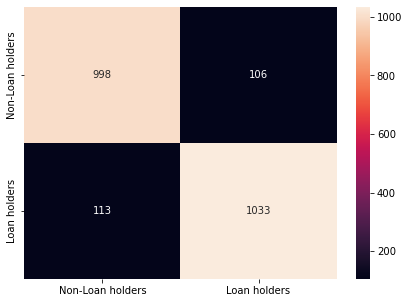

In [107]:
# Confusion Matrix
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True , fmt = 'g')
plt.show()

In [108]:
# Classification Matrix
print("Classification  Matrix:\n", classification_report(y_test, logit_pred))

Classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      1104
         1.0       0.91      0.90      0.90      1146

    accuracy                           0.90      2250
   macro avg       0.90      0.90      0.90      2250
weighted avg       0.90      0.90      0.90      2250



Now we can see recall value is improved after sampling.

#### Wenever we have imbalanced target we can use the sampling method  to balance the data.

#### If we do SMOTE on entire data it may leak information to validation data as well. We need to test the model with unseen information. 

#### So we should perform sampling only on the training data.

In [109]:
# Split X and y into training and test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [110]:
# Here we are doing SMOTE for training data
smote_nc = SMOTENC(categorical_features=[1,3,5], random_state = 1)  #specifying categorical column numbers
x_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train)

In [111]:
print('Before sampling:')
y.value_counts().to_frame()

Before sampling:


,LoanOnCard
0.0,4500
1.0,480


In [112]:
print('After sampling on both test and train data:')
y_s.value_counts().to_frame()

After sampling on both test and train data:


,LoanOnCard
0.0,4500
1.0,4500


In [113]:
print('After sampling on test data only:')
y_train_res.value_counts().to_frame()

After sampling on test data only:


,LoanOnCard
0.0,3382
1.0,3382


In [114]:
logit = LogisticRegression()
logit.fit(x_train_res, y_train_res)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:', logit.score(X_train, y_train))
print('Accuracy on Test data:', logit.score(X_test, y_test))

Accuracy on Training data: 0.8966532797858099
Accuracy on Test data: 0.8883534136546185


We can see that there is a decrease in test accuracy.

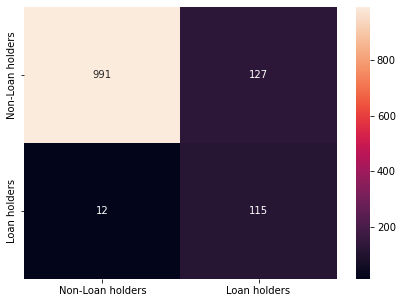

In [115]:
# Confusion Matrix
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True , fmt = 'g')
plt.show()

In [116]:
# Classification Matrix
print("Classification  Matrix:\n", classification_report(y_test, logit_pred))

Classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.99      0.89      0.93      1118
         1.0       0.48      0.91      0.62       127

    accuracy                           0.89      1245
   macro avg       0.73      0.90      0.78      1245
weighted avg       0.94      0.89      0.90      1245



After doing sampling only on training data we can see difference in values.

We are getting good recall value but the precision value is reduced.

We will do sampling oly on training data to check real performance of the model.

### K-Fold CV for finding best model

In [117]:
LinR_model = LinearRegression()
LogR_model = LogisticRegression()
KNN_model = KNeighborsClassifier(n_neighbors = 15)
GN_model = GaussianNB()
svc_model_linear = SVC(C = .1, kernel = 'linear', gamma = 1)

LinR: nan (nan)
LogR: 0.945181 (0.007462)
KNN: 0.922892 (0.007890)
NB: 0.883936 (0.012241)
SVM-linear: 0.948795 (0.007419)


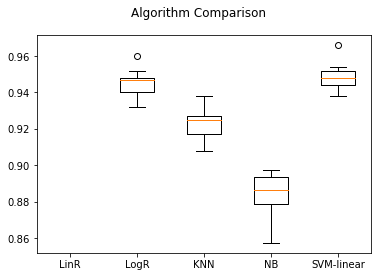

In [118]:
seed = 1
# prepare models
models = []
models.append(('LinR', LinR_model))
models.append(('LogR', LogR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-linear', svc_model_linear))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10)
    cv_results = model_selection.cross_val_score(model, X, y, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### As we are having imbalanced data we need to use stratified k-fold to check the performance

LinR: nan (nan)
LogR: 0.945984 (0.008955)
KNN: 0.923092 (0.008085)
NB: 0.883936 (0.012757)
SVM-linear: 0.949598 (0.009395)


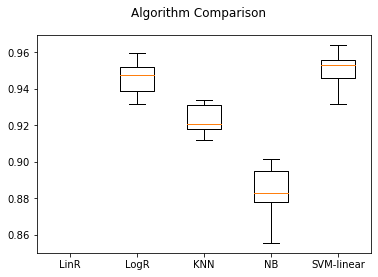

In [119]:
seed = 1
# prepare models
models = []
models.append(('LinR', LinR_model))
models.append(('LogR', LogR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-linear', svc_model_linear))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.StratifiedKFold(n_splits = 10)
    cv_results = model_selection.cross_val_score(model, X, y, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##  6. Conclusion and Performance Improvement

#### Observations:

Both Logistic regression and Linear SVM have same performance parameters. But, SVM is expensive to train compared to Logistic regression.

#### Conclusion:
    
We are selecting final model as logistic regression as it performs well in training and testing test.

Logistic Regression is not affected by overfitting and it is also has good recall value.

Logistic regression performed well in k-fold cross validation as well.

Deviation also less in logistic regression.

Sampling improved to predict minority classes as well.

#### Performance Improvement:
    
Suggesting to collect data equally for both the classes for the target variable LoanOnCard.

Few customers who don't have credit cards issued still have a loan on their cards. This data error can be avoided.

## End of Part B

## End of Project